In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt

In [21]:
new_design = pd.read_csv('new_design.csv')

In [22]:
ab = pd.read_csv('ab_data.csv')

In [23]:
# ab lentelė:

# user_id: vartotojo ID.
# timestamp: laikas.
# group: viena iš dviejų tyrimo grupių.
# landing_page: indikatorius, rodantis, ar vartotojas, aplankė seno ar naujo tipo puslapį.
# converted: indikatorius, rodantis, ar pirkėjas pirko (1) ar ne (0).  


# 1. Kiek eilučių ir stulpelių turi ab lentelė?
# 2. Kokį laiko intevalą dengia duomenys?
# 3. Išrikikuokite lentelę pagal "user_id" ir "timestamp". 
# 4. Ar yra trūkstamų reikšmių. Jei taip - kiek? Ištrinkite jas. 
# 5. Kiek yra vartotojų sudaro "control" ir "treatment" grupes?
# 6. Kiek unikalių "control" ir "treatment" esančių vartotojų matė "old_page" ir "new_page"? Pabandykite vizualizuoti šią informaciją. 
# 7. Kokia dalis "control" ir "treatment" grupių vartotojų pirko iš atitinkamai "old_page" ir "new_page"?
# 8. Kurį mėnesį, savaitę, savaitės dieną buvo daugiausiai nupirkta iš "control" ir "treatment" grupių?
# 9. Apskaičiuokite santykį tarp pirkimų ir visų apsilankymų "old_page" ir "new_page" abiems grupėms ("control" ir "treatment" atskirai).
# 10. Pateikite pirmines įžvalgas, ar naujasis puslapis yra susijęs su didesniais pirkimais?

In [24]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [25]:
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [26]:
# 1. Kiek eilučių ir stulpelių turi ab lentelė?

ab.shape

(294478, 5)

In [27]:
# 2. Kokį laiko intevalą dengia duomenys?

ab['timestamp'] = pd.to_datetime(ab['timestamp'])
ab['timestamp'].dt.day.sort_values()

245040     2
27445      2
272484     2
27450      2
10854      2
          ..
143992    24
42106     24
79794     24
79838     24
169596    24
Name: timestamp, Length: 294478, dtype: int64

In [154]:
ab['timestamp'].max(), ab['timestamp'].min()

(Timestamp('2017-01-24 13:41:54.460509'),
 Timestamp('2017-01-02 13:42:05.378582'))

In [10]:
# ab1 = ab.set_index(ab['timestamp'])

In [28]:
# 3. Išrikikuokite lentelę pagal "user_id" ir "timestamp". 
ab.sort_values(by=['user_id', 'timestamp'])

,user_id,timestamp,group,landing_page,converted
63114,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
103873,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
205236,630002,2017-01-19 19:20:56.438330,control,old_page,0
247344,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
242283,630004,2017-01-18 20:23:58.824994,treatment,new_page,0
...,...,...,...,...,...
274312,945994,2017-01-03 14:41:21.565258,control,old_page,0
275777,945996,2017-01-09 18:58:19.952277,treatment,new_page,0
109353,945997,2017-01-04 06:56:24.658147,control,old_page,0
241062,945998,2017-01-16 07:08:02.207969,control,old_page,0


In [13]:
# 4. Ar yra trūkstamų reikšmių. Jei taip - kiek? Ištrinkite jas. 

ab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [29]:
# 5. Kiek yra vartotojų sudaro "control" ir "treatment" grupes?

ab['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [49]:
ab.groupby('user_id')['landing_page'].sum().count()

290584

290584


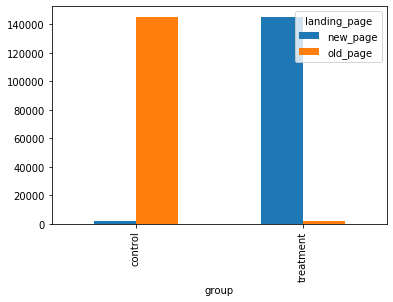

In [157]:
# 6. Kiek unikalių "control" ir "treatment" esančių vartotojų matė "old_page" ir "new_page"? Pabandykite vizualizuoti šią informaciją.


print(ab['user_id'].nunique())
ab.groupby('group')['landing_page'].value_counts().unstack().plot(kind='bar')

In [37]:
# 7. Kokia dalis "control" ir "treatment" grupių vartotojų pirko iš atitinkamai "old_page" ir "new_page"?

ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [51]:
ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()

converted                    0      1
group     landing_page               
control   new_page        1694    234
          old_page      127785  17489
treatment new_page      128047  17264
          old_page        1715    250

In [59]:
control_new_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][0] / ab.groupby(['group'])['converted'].value_counts()[1]
control_new_page

0.013203182305478756

In [64]:
control_old_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][1] / ab.groupby(['group'])['converted'].value_counts()[1]
control_old_page

0.9867968176945212

In [75]:
treatment_new_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][2] / ab.groupby(['group'])['converted'].value_counts()[3]
treatment_new_page

0.9857257051501656

In [78]:
treatment_old_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][3] / ab.groupby(['group'])['converted'].value_counts()[3]
treatment_old_page

0.014274294849834418

In [79]:
# 8. Kurį mėnesį, savaitę, savaitės dieną buvo daugiausiai nupirkta iš "control" ir "treatment" grupių?

ab1 = ab.set_index(ab['timestamp'])

In [91]:
ab1['day'] = ab1['timestamp'].dt.day
ab1['week'] = ab1['timestamp'].dt.week

In [92]:
ab1.head()

,user_id,timestamp,group,landing_page,converted,day,week
timestamp,,,,,,,
2017-01-21 22:11:48.556739,851104,2017-01-21 22:11:48.556739,control,old_page,0,21,3
2017-01-12 08:01:45.159739,804228,2017-01-12 08:01:45.159739,control,old_page,0,12,2
2017-01-11 16:55:06.154213,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,11,2
2017-01-08 18:28:03.143765,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,8,1
2017-01-21 01:52:26.210827,864975,2017-01-21 01:52:26.210827,control,old_page,1,21,3


In [90]:
ab1.query('group == "control" & converted == "1"')['day'].value_counts().sort_values()

2     362
24    451
3     760
20    763
10    763
6     778
13    779
19    795
22    796
5     801
7     805
8     805
9     806
11    808
12    809
4     810
16    816
17    818
18    820
15    823
14    842
23    854
21    859
Name: day, dtype: int64

In [93]:
ab1.query('group == "control" & converted == "1"')['week'].value_counts().sort_values()

4    1305
1    5121
2    5630
3    5667
Name: week, dtype: int64

In [107]:
# 9. Apskaičiuokite santykį tarp pirkimų ir visų apsilankymų "old_page" ir "new_page" abiems grupėms ("control" ir "treatment" atskirai).

ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()

converted                    0      1
group     landing_page               
control   new_page        1694    234
          old_page      127785  17489
treatment new_page      128047  17264
          old_page        1715    250

In [118]:
control_new_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][0] / (ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][0] + ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[0][0])
control_new_page


0.12136929460580913

In [122]:
control_old_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][1] / (ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][1] + ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[0][1])
control_old_page

0.1203863045004612

In [126]:
treatment_new_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][2] / (ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][2] + ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[0][2])
treatment_new_page

0.11880724790277405

In [127]:
treatment_old_page = ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][3] / (ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[1][3] + ab.groupby(['group','landing_page'])['converted'].value_counts().unstack()[0][3])
treatment_old_page

0.1272264631043257

In [ ]:
new_design

# uid: vartotojo ID
# new_design_page: True - vartotojas lankėsi naujo tipo puslapyje, False - seno tipo.
# login_count: kiek kartų vartotojas įsiregistravo į šį puslapį.
# search_count: kiek kartų vartotojas naudojosi paieška. 


# 1. Kiek eilučių ir stulpelių turi new_design lentelė?
# 2. Pervadinkite "uid" į "user_id".
# 3. Kiek unikalių vartotojų aplankė naujo ir seno dizaino puslapį?
# 4. Kiek kartų buvo įsiregistruota ir ieškota seno ir naujo dizaino puslapiuose? 
# 5. Ar yra trūkstamų reikšmių. Jei taip - kiek? Ištrinkite jas. 
# 6. Suskaičiuokite kiek kartų vidutiniškai ieškoma naujo ir seno dizaino puslapiuose?
# 7. Pateikite pirmines įžvalgas, ar naujasis puslapis yra susijęs su didesniais pirkimais?

In [128]:
new_design

,uid,new_design_page,login_count,search_count
0,6061521,True,1,2
1,11986457,False,4,0
2,15995765,False,1,0
3,9106912,True,3,0
4,9882383,False,1,0
...,...,...,...,...
676,16768212,False,2,0
677,7643715,True,1,0
678,14838641,False,1,0
679,6454817,False,2,0


In [129]:
# 1. Kiek eilučių ir stulpelių turi new_design lentelė?
new_design.shape

(681, 4)

In [137]:
# 2. Pervadinkite "uid" į "user_id".
new_design.rename(columns={"uid": "user_id"}, inplace = True)
new_design.head()

,user_id,new_design_page,login_count,search_count
0,6061521,True,1,2
1,11986457,False,4,0
2,15995765,False,1,0
3,9106912,True,3,0
4,9882383,False,1,0


In [134]:
# 3. Kiek unikalių vartotojų aplankė naujo ir seno dizaino puslapį?

In [138]:
new_design['user_id'].nunique()

681

In [141]:
new_design.groupby(['new_design_page'])['login_count'].sum()

new_design_page
False    1140
True      631
Name: login_count, dtype: int64

In [148]:
# 4. Kiek kartų buvo įsiregistruota ir ieškota seno ir naujo dizaino puslapiuose? 
new_design.groupby(['new_design_page'])[['login_count', 'search_count']].sum()

,login_count,search_count
new_design_page,,
False,1140,288
True,631,209


In [149]:
# 5. Ar yra trūkstamų reikšmių. Jei taip - kiek? Ištrinkite jas. 

new_design.isnull().sum()

user_id            0
new_design_page    0
login_count        0
search_count       0
dtype: int64

In [151]:
# 6. Suskaičiuokite kiek kartų vidutiniškai ieškoma naujo ir seno dizaino puslapiuose?
new_design.groupby(['new_design_page'])['search_count'].mean()


new_design_page
False    0.645740
True     0.889362
Name: search_count, dtype: float64

In [ ]:
# 7. Pateikite pirmines įžvalgas, ar naujasis puslapis yra susijęs su didesniais pirkimais?